<a href="https://colab.research.google.com/github/renanalvesdeveloper/Data-Science/blob/master/ML_QualidadeVinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e construção de um modelo Machine Learning para determinar a qualidade de um Vinho** 

<img alt="Colaboratory logo" width="100%" src="https://blog.superbid.net/wp-content/uploads/2018/08/brasileiros-vinhos.png">

#### *by [Renan Alves](https://www.linkedin.com/in/renan-alves-9b1b71b7/)*

---

## Contextualização 

Esse projeto tem por objetivo construir um modelo Machine Learning para determinar a qualidade de um vinho. A proposta é aplicar as técnicas de aprendizado de máquina para determinar quais propriedades físico-químicas tornam um vinho 'bom'.


Os dados analisados encontram-se disponiveis no [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).

***Neste Notebook, primeiramente iremos realizar a análise dos dados usando matplotlib e seaborn. Após essa primeira etapa, iremos aplicar diferentes modelos de classificações para prever a qualidade do vinho.***

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios

import pandas as pd #fornecer ferramentas para análise dos dados
import seaborn as sns # fornecer a visualização dos dados
import matplotlib.pyplot as plt # fornecer a visualização dos dados

#fornecer ferramentas para trabalharmos com aprendizado de máquina
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo datasets_4458_8204_winequality-red.csv para um DataFrame
df_vinhos = pd.read_csv('https://raw.githubusercontent.com/renanalvesdeveloper/Data-Science/master/DataSets/datasets_4458_8204_winequality-red.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `fixed acidity` 
* `volatile acidity` 
* `citric acid` 
* `residual sugar` 
* `chlorides`
* `free sulfur dioxide`
* `total sulfur dioxide`
* `pH` 
* `sulphates` 
* `alcohol` 
* `quality`


Para facilitar o nosso entendimento antes de iniciarmos as análises, iremos alterar o nome das colunas.

In [ ]:
#traduzindo/renomeando colunas
colunas = {
			'fixed acidity':'acidez_fixa',      
			'volatile acidity' : 'acidez_volatil',    
			'citric acid' : 'acido_citrico',       
			'residual sugar': 'acucar_residual',     
			'chlorides' : 'cloretos',           
			'free sulfur dioxide' : 'dioxido_enxofre_livre',
			'total sulfur dioxide' : 'dioxido_enxofre_total',
			'density' : 'densidade',             
			'pH': 'ph',                  
			'sulphates' : 'sulfatos',          
			'alcohol' : 'alcool',             
			'quality' :'qualidade'
}

df_vinhos = df_vinhos.rename(colunas, axis=1)

In [ ]:
# mostrar as 5 primeiras entradas
df_vinhos.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas(linhas):\t{}".format(df_vinhos.shape[0]))
print("Variáveis(colunas):\t{}".format(df_vinhos.shape[1]))

print()

#verificar os tipos de cada variavel do dataset
df_info = df_vinhos.dtypes
df_info = pd.DataFrame(df_info)
df_info.columns = ['Tipo']
df_info.columns.name = 'Colunas'
df_info

Entradas(linhas):	1599
Variáveis(colunas):	12



Colunas,Tipo
acidez_fixa,float64
acidez_volatil,float64
acido_citrico,float64
acucar_residual,float64
cloretos,float64
dioxido_enxofre_livre,float64
dioxido_enxofre_total,float64
densidade,float64
ph,float64
sulfatos,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Verificamos que não existem valores nulo em nossa base.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df_vinhos.isnull().sum()/df_vinhos.shape[0])*100).sort_values(ascending=False)

qualidade                0.0
alcool                   0.0
sulfatos                 0.0
ph                       0.0
densidade                0.0
dioxido_enxofre_total    0.0
dioxido_enxofre_livre    0.0
cloretos                 0.0
acucar_residual          0.0
acido_citrico            0.0
acidez_volatil           0.0
acidez_fixa              0.0
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

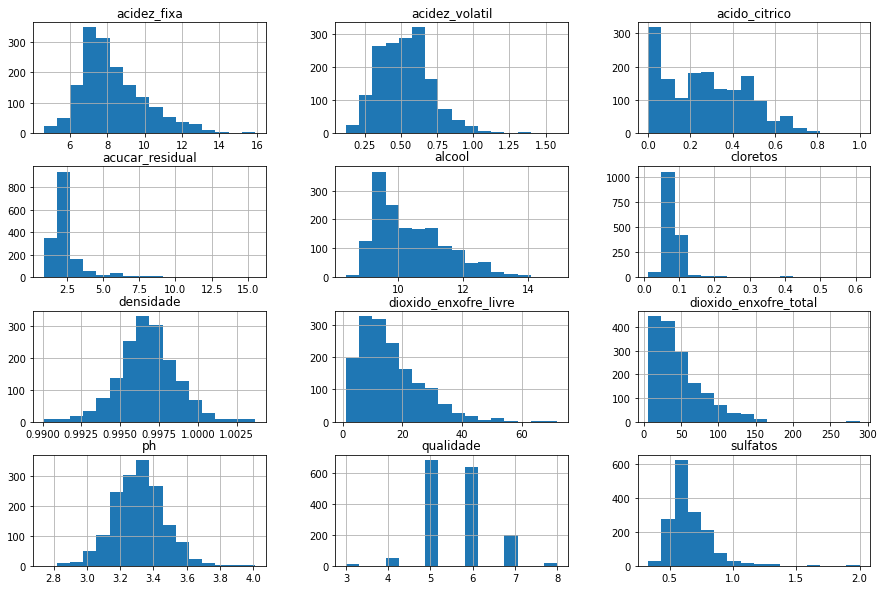

In [ ]:
# plotar o histograma das variáveis numéricas
df_vinhos.hist(bins=16,figsize=(15,10));

### **Q4. Qual a média de qualidade dos Vinhos?**

In [ ]:
# ver a média da coluna `qualidade``
f'A Média de Qualidade dos Vinhos: {round(df_vinhos.qualidade.mean(), 2)}'

'A Média de Qualidade dos Vinhos: 5.64'

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
cor = df_vinhos[['acidez_fixa','acidez_volatil','acido_citrico','acucar_residual','cloretos','dioxido_enxofre_livre', 'dioxido_enxofre_total','densidade','ph','sulfatos','alcool','qualidade']]
# mostrar a matriz de correlação
display(cor)

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


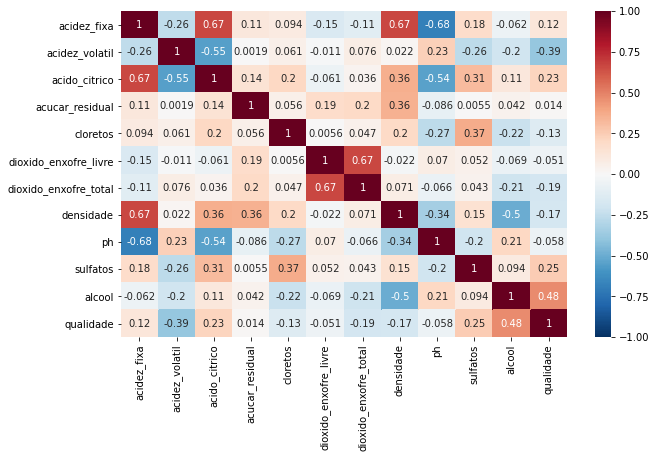

In [ ]:
# plotar um heatmap a partir das correlações
correlation = df_vinhos.corr()
# display(correlation)
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

***Podemos observar que existe um correlação positiva entre as variáveis*** `alcool` ***e*** `qualidade` ***que é a nossa coluna chave.***


### **Q5. Nesta etapa iremos plotar alguns gráficos detalhando as relações de cada uma dessas colunas com a nossa coluna principal `qualidade`.**




**Qualidade VS Acidez Fixa**

> *Aqui vemos que a acidez fixa não fornece nenhuma especificação para classificar a qualidade.*

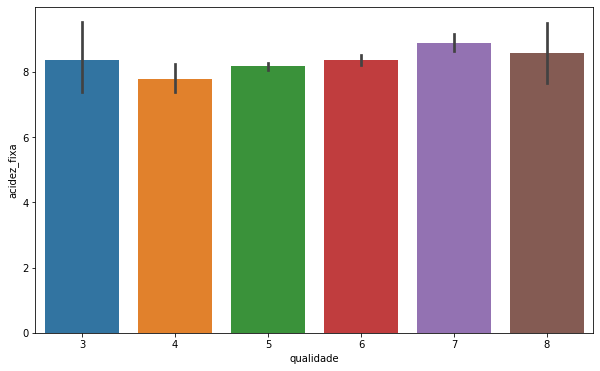

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade',y='acidez_fixa',data=df_vinhos);

**Qualidade VS Acidez Volátil**

> *Aqui vemos que há um realção com a baixa acidez volátil e a melhora na qualidade do vinho.*

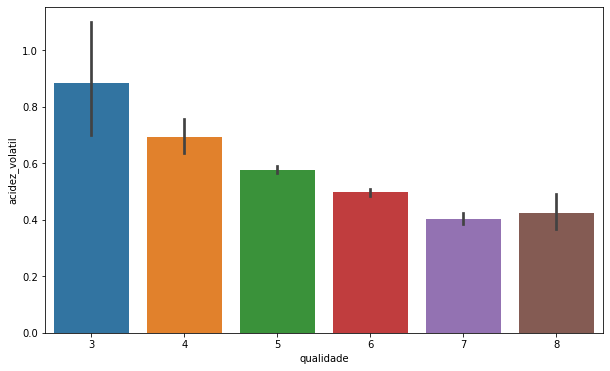

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade',y='acidez_volatil', data=df_vinhos);

**Qualidade VS Ácido Cítrico**

> *Aqui vemos que quanto maior o ácido cítrico, melhor a qualidade do Vinho.*

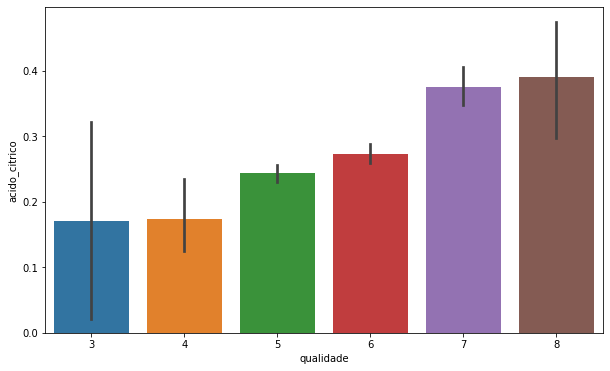

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade',y='acido_citrico', data=df_vinhos);

**Qualidade VS Açucar Residual**

 > *Aqui vemos que a açucar residual não fornece nenhuma especificação para classificar a qualidade.*

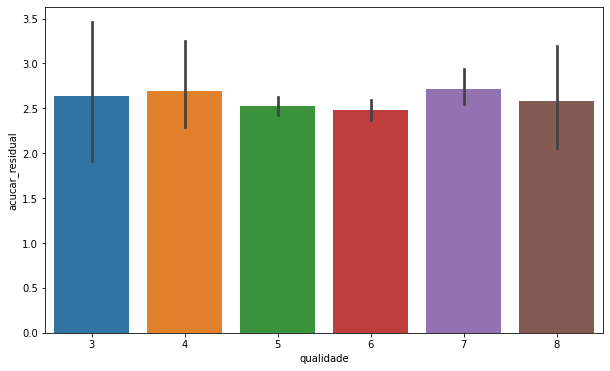

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade', y='acucar_residual', data = df_vinhos);

**Qualidade VS Cloretos**

 > *Vemos que quanto menor a composição de cloreto, melhor é a qualidade do vinho.*

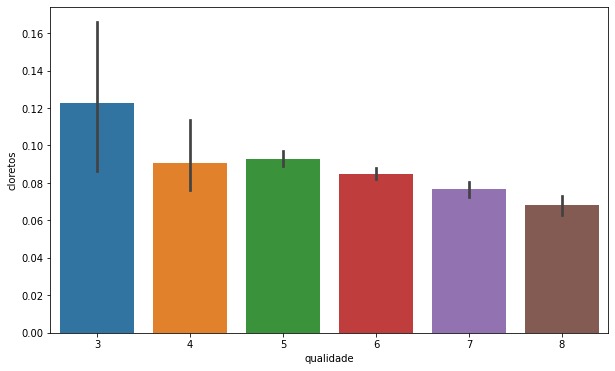

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade', y='cloretos', data = df_vinhos);

**Qualidade VS Dióxido de Enxofre Livre**

 > *Aqui vemos que a Dióxido de Enxofre Livre não fornece nenhuma especificação para classificar a qualidade.*

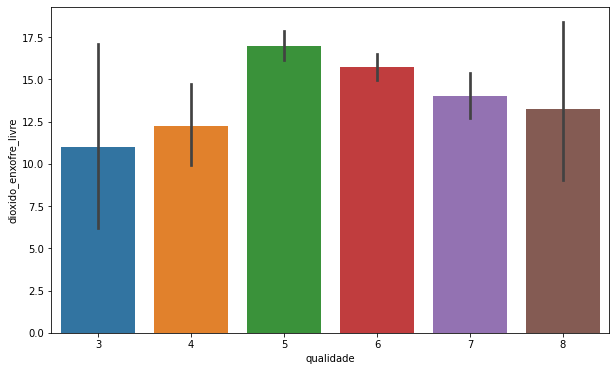

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'qualidade', y = 'dioxido_enxofre_livre', data = df_vinhos);

**Qualidade VS Dióxido de Enxofre Totais**

 > *Aqui vemos que a Dióxido de Enxofre Totais não fornece nenhuma especificação para classificar a qualidade.*

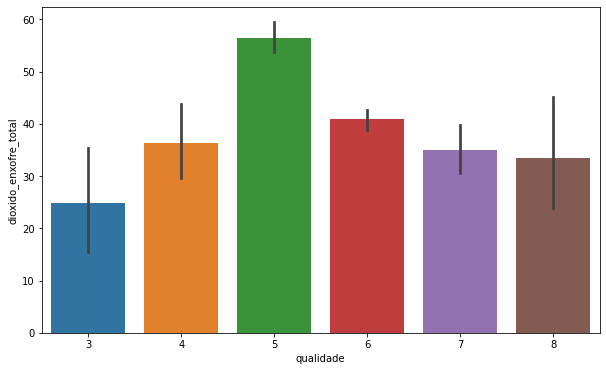

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'qualidade', y = 'dioxido_enxofre_total', data = df_vinhos);

**Qualidade VS Sulfatos**

 > *Aqui vemos que quanto maior a composição de sulfato melhor a qualidade do vinho.*

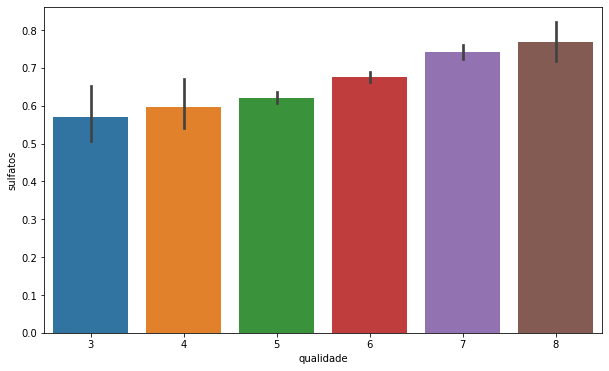

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade', y='sulfatos', data=df_vinhos);

**Qualidade VS Ph**

 > *Aqui vemos que o Ph não fornece nenhuma especificação para classificar a qualidade.*

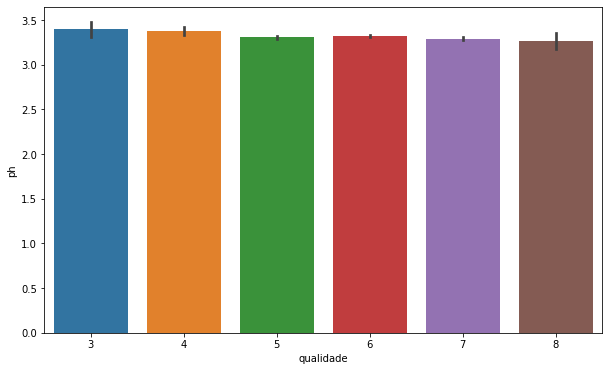

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade', y='ph', data=df_vinhos);

**Qualidade VS Álcool**

 > *Aqui vemos que quanto maior a composição de álcool melhor a qualidade do vinho.*

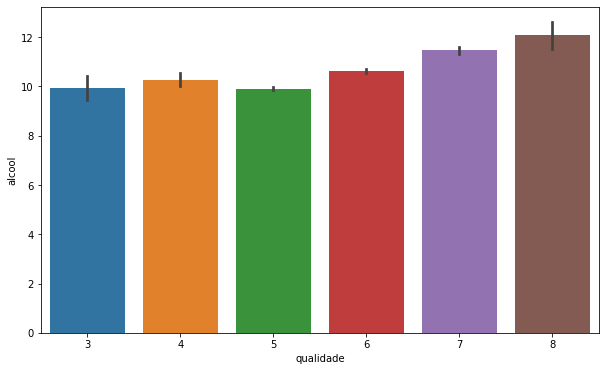

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='qualidade', y='alcool', data=df_vinhos);

### **Q6. Nesta etapa iremos preparar a base para executarmos os algoritmos de aprendizado de máquina.**


In [ ]:
#Construiremos uma classificação binária para a variável de resposta.
#Iremos dividir o vinho como bom [good] e ruim[bad], dando um limite para a qualidade
bins = (2, 6.5, 8)
grupos = ['bad','good']
df_vinhos.qualidade = pd.cut(df_vinhos.qualidade, bins = bins, labels=grupos)





In [ ]:
df_vinhos.qualidade.value_counts()

bad     1382
good     217
Name: qualidade, dtype: int64

In [ ]:
#vamos criar uma variavel e usar o labelEncoder para normalizar nossa coluna qualidade
val_qualidade = LabelEncoder()

In [ ]:
#chamando a função fit_transform e aplicando os valores 0 e 1 a coluna qualidade
df_vinhos['qualidade'] = val_qualidade.fit_transform(df_vinhos['qualidade'])

In [ ]:
df_vinhos.qualidade.value_counts()

0    1382
1     217
Name: qualidade, dtype: int64

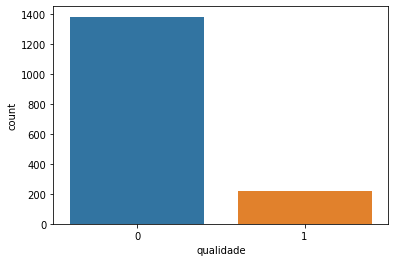

In [ ]:
#plotanto a distribuição na coluna qualidade
sns.countplot(df_vinhos.qualidade)

> ***Podemos notar que de acordo com a nossa classificação existem mais vinho classificados como ruim [0] do que bom [1].***


In [ ]:
#Vamos separar o conjunto de dados
X = df_vinhos.drop('qualidade',axis=1) #aqui temos todos os dados menos a coluna de qualidade
y = df_vinhos.qualidade #aqui temos somente a coluna de qualidade

In [ ]:
#Vamos treinar e testar a divisão de dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state =42)


In [ ]:
#Aplicando a escala padrão para obter resultados otimizados
sc = StandardScaler()

In [ ]:
X_treino = sc.fit_transform(X_treino)
X_teste = sc.fit_transform(X_teste)

### **Q7. Nesta etapa iremos aplicar os modelos de aprendizado de máquina.**


> **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_treino, y_treino)
pred_rfc = rfc.predict(X_teste)

In [ ]:
#verificando o desepenho do modelo
print(classification_report(y_teste, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.60      0.38      0.47        47

    accuracy                           0.87       320
   macro avg       0.75      0.67      0.70       320
weighted avg       0.86      0.87      0.86       320



> ***Random forest nos oferece uma precisão de 86%***


In [ ]:
print(confusion_matrix(y_teste, pred_rfc))

[[261  12]
 [ 29  18]]


<img alt="Colaboratory logo" width="50%" src="https://i.ibb.co/RP0HR3Z/matriz-confusao.png">

> **Stochastic Gradient Decent Classifier**

In [ ]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_treino,y_treino)
pred_sgd = sgd.predict(X_teste)

In [ ]:
print(classification_report(y_teste, pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.28      0.37        47

    accuracy                           0.86       320
   macro avg       0.73      0.62      0.65       320
weighted avg       0.84      0.86      0.84       320



> ***Stochastic Gradient Decent Classifier nos oferece uma precisão de 73%***

In [ ]:
print(confusion_matrix(y_teste, pred_sgd))

[[263  10]
 [ 34  13]]


> **Support Vector Classifier**


In [ ]:
svc = SVC()
svc.fit(X_treino, y_treino)
pred_svc = svc.predict(X_teste)

In [ ]:
print(classification_report(y_teste, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



> ***Support Vector Classifier nos oferece uma precisão de 86%***

**Vamos tentar aumentar a precisão dos nossos modelos**

> **Grid Search CV**


In [ ]:
#Buscar os melhores parâmetros para o nosso modelo SVC
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_treino, y_treino)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#melhores parametros para o modelo SVC
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
#Vamos rodar novamente o modelo SVC com os melhores parametros
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_treino, y_treino)
pred_svc2 = svc2.predict(X_teste)
print(classification_report(y_teste, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



> ***SVC melhorou de 86% para 90% usando o Grid Search CV***

> **Cross Validation Score para o Random Forest**

In [ ]:
#vamos determinar um universo de 10 combinações para o nosso teste (cv)
rfc_eval = cross_val_score(estimator = rfc, X = X_treino, y = y_treino, cv = 10)
rfc_eval.mean()*100

91.40194389763779

> ***O Random Forest melhorou de 86% para 91% usando o Cross Validation***

## Conclusões


> Implementando as funções **GridSearchCV** e **cross_val_score**, podemos concluir após essas análises e construções dos modelos de aprendizado, que os algoritmos de predição **Random Forest** e **Support Vector Classifier**, nos fornecem uma margem de **91%** de acerto quanto à qualidade dos vinhos. 

>> * **GridSearchCV** realiza a criação de combinações de parâmetros para posteriormente avaliá-las, e com isso, ele consegue determinar quais são os melhores parâmetros para o nosso modelo.

>> * **cross_val_score** separa uma parte dos dados para treino e teste criando várias combinações diferentes, onde cada combinação nos retorna um valor que é sua taxa de acerto. Em síntese, foi calculado a média dessas taxas, determinando assim a taxa média de acerto dentre essas combinações.

> Conclui-se que o uso desses algoritmos nos possibilitaram alcançar um valor de acertividade relevante para os nosso modelos.
